# PHYS 331 - Introduction to Numerical Techniques in Physics
## Homework 8: Numerical integration
### Problem 1 -  Errors across methods (10 points)
---
Name: Bailey Canter

Onyen: bailove

Cell for *Problem 1* is below.

Simpson's 1/3 method integral =  0.829092913606
Simpson's 3/8 method integral =  0.828252560812
Trapezoidalmethodintegral =  0.838805638174
[-2.93514753 -3.07050545 -5.1101952  -7.38307513 -9.58731128]


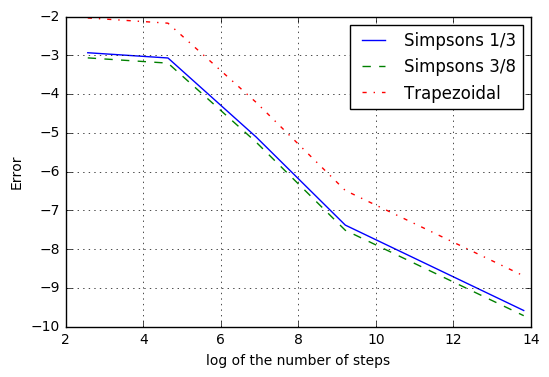

In [8]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

def trapezoidInt(a,b,f,Np,method):
    """
    Calculates the integral of f(x) between points a and b via Simpson's methods
    
    PARAMETERS:
        a -- lower integration limit;
             
        b -- higher integration limit;

        f -- function to be integrated;
        
        Np -- number of integration points requested;
        
        method -- a flag to choose between trapezoidal and Simpson 1/3 and 3/8 methods.
        
        See the assignment sheet for additional details about these
        function parameters.
             
    RETURNS:
        The estimate of the integral.
    """
    Integral = 0.0
       
    dx = float(b-a)/Np
    xarr = linspace(a,b,Np+1)
   
    # Simpson's 1/3 method
    if method == 0:
        Integral = f(a)+f(b)
        for i in range(1,len(xarr)):
            if i%2 == 1:
                Integral += 4.*f(xarr[i])
            else:
                Integral += 2.*f(xarr[i])
        Integral = Integral*dx/3.
        #print('Simpson\'s 1/3 method integral = ' +str(Integral))
    
    
    # Simpson's 3/8 method
    if method == 1:
        Integral = f(a)+f(b)
        for i in range(1,len(xarr)):
            if i%3 == 0:
                Integral += 2.*f(xarr[i])
            else:
                Integral += 3.*f(xarr[i])
        Integral = Integral*0.375*dx
        #print('Simpson\'s 3/8 method integral = ' +str(Integral))
    
    
    c = 0
    #trapezoidal method 
    if method == 2: 
            c = sum(f(xarr[:]))
            Integral = (dx/2)*(f(a)+f(b))+dx*c
            #print('Trapezoidal method integral = ' +str(Integral))
    
    return Integral
    
def imnotfuncy(x):
    return np.log(1+x)/x


def main():

    c1 = trapezoidInt(0.0001, 1.000, imnotfuncy, 103, 0)
    print('Simpson\'s 1/3 method integral = ', c1)
    c2 = trapezoidInt(0.0001, 1.000, imnotfuncy, 103, 1)
    print('Simpson\'s 3/8 method integral = ', c2)
    c3 = trapezoidInt(0.0001, 1.000, imnotfuncy, 103, 2)
    print('Trapezoidalmethodintegral = ', c3)
    
    n = np.array([13.0, 103.0, 1003.0, 10003.0, 1000003.0])
    error1 = np.zeros(5)
    error2 = np.zeros(5)
    error3 = np.zeros(5)
    i = 1
    for i in range(0, len(n)):
        error1[i] = (trapezoidInt(0.0001, 1.000, imnotfuncy, n[i], 0)- trapezoidInt(0.0001, 1.000, imnotfuncy, n[i-1], 0))
        error2[i] = (trapezoidInt(0.0001, 1.000, imnotfuncy, n[i], 1)- trapezoidInt(0.0001, 1.000, imnotfuncy, n[i-1], 1))
        error3[i] = (trapezoidInt(0.0001, 1.000, imnotfuncy, n[i], 2)- trapezoidInt(0.0001, 1.000, imnotfuncy, n[i-1], 2))          
    
    m = np.array([13.0, 103.0, 1003.0, 10003.0, 1000003.0])
    m = np.log(m)
    error_1 = np.log(abs(error1))
    error_2 = np.log(abs(error2))
    error_3 = np.log(abs(error3))
    print(error_1)
    
    plt.plot(m, error_1, '-')
    plt.plot(m, error_2, '--')
    plt.plot(m, error_3, '-.')
    plt.grid(True)
    plt.xlabel('log of the number of steps')
    plt.ylabel('Error')
    plt.legend(('Simpsons 1/3','Simpsons 3/8', 'Trapezoidal'))
    plt.show()
                  
main()  # Don't delete the call to main() by mistake!